## RunningBack Measures	    
	
    Yards per Rushing Attempts
	Yards Rushing per TD
    Yards per Reception
	Yards Receiving per TD
	Number of Fumbles


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
rbdf20 = pd.read_csv("RBStats2020.csv")
rbdf19 = pd.read_csv("RBStats2019.csv")
rbdf20

,Player Name,Fantasy Points,Passing Attempts,Passing Completions,Passing Yards,Passing TD,Interceptions,Passing 2PT Conversions,Rushing Attempts,Rushing Yards,Rushing TD,Rushing 2PT Conversions,Receptions,Receiving Yards,Receiving TD,Receiving 2PT,Fumbles
0,Jonathan Taylor,314,0,0,0,0,0,0,317,1734,18,0,37,342,2,0,2
1,Austin Ekeler,238,0,0,0,0,0,0,190,847,11,1,65,612,7,0,3
2,Joe Mixon,235,0,0,0,0,0,0,292,1205,13,0,42,314,3,0,1
3,Najee Harris,207,0,0,0,0,0,0,296,1172,7,0,70,440,3,0,0
4,James Conner,189,0,0,0,0,0,0,187,700,14,0,31,334,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Mekhi Sargent,0,0,0,0,0,0,0,4,9,0,0,0,0,0,0,0
159,Dwayne Washington,0,0,0,0,0,0,0,4,16,0,0,2,12,0,0,0
160,Derek Watt,0,0,0,0,0,0,0,1,1,0,0,3,15,0,0,0
161,Khari Blasingame,-1,0,0,0,0,0,0,3,6,0,0,1,-1,0,0,1


In [22]:
RBMeasures20 = rbdf20[["Player Name","Fantasy Points","Rushing Attempts","Rushing Yards", "Rushing TD","Receptions","Receiving Yards","Receiving TD","Fumbles"]]
RBMeasures20.dtypes



Player Name         object
Fantasy Points       int64
Rushing Attempts     int64
Rushing Yards        int64
Rushing TD           int64
Receptions           int64
Receiving Yards      int64
Receiving TD         int64
Fumbles              int64
dtype: object

In [27]:
RBMeasures19 = rbdf19[["Player Name","Fantasy Points","Rushing Attempts","Rushing Yards", "Rushing TD","Receptions","Receiving Yards","Receiving TD","Fumbles"]]
RBMeasures19



,Player Name,Fantasy Points,Rushing Attempts,Rushing Yards,Rushing TD,Receptions,Receiving Yards,Receiving TD,Fumbles
0,Christian McCaffrey,340,287,1387,15,116,1005,4,0
1,Derrick Henry,266,303,1540,16,18,206,2,3
2,Aaron Jones,255,236,1084,16,49,474,3,2
3,Ezekiel Elliott,246,301,1357,12,54,420,2,2
4,Dalvin Cook,229,250,1135,13,53,519,0,2
...,...,...,...,...,...,...,...,...,...
148,Senorise Perry,0,3,3,0,1,1,0,0
149,Jordan Scarlett,0,4,9,0,0,0,0,0
150,De'Lance Turner,0,4,6,0,0,0,0,0
151,Dexter Williams,0,5,11,0,0,0,0,0


In [24]:
RushingYPRA20 = RBMeasures20['Rushing Yards']/RBMeasures20['Rushing Attempts']
RushingYPTD20 = RBMeasures20['Rushing Yards']/RBMeasures20['Rushing TD']
YPR20 = RBMeasures20['Receiving Yards']/RBMeasures20['Receptions']
YRPTD20 = RBMeasures20['Receiving Yards']/RBMeasures20['Receiving TD']


In [28]:
RushingYPRA19 = RBMeasures19['Rushing Yards']/RBMeasures19['Rushing Attempts']
RushingYPTD19 = RBMeasures19['Rushing Yards']/RBMeasures19['Rushing TD']
YPR19 = RBMeasures19['Receiving Yards']/RBMeasures19['Receptions']
YRPTD19 = RBMeasures19['Receiving Yards']/RBMeasures19['Receiving TD']


In [30]:
RBMeasures20["Rushing Yards per Rushing Attempts"] = RushingYPRA20
RBMeasures20["Rushing Yards per TD"] = RushingYPTD20
RBMeasures20["Receiving Yards per Reception"] = YPR20
RBMeasures20["Receiving Yards per TD"] = YRPTD20

<ipython-input-30-a89739173c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RBMeasures20["Rushing Yards per Rushing Attempts"] = RushingYPRA20
<ipython-input-30-a89739173c0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RBMeasures20["Rushing Yards per TD"] = RushingYPTD20
<ipython-input-30-a89739173c0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [31]:
RBMeasures19["Rushing Yards per Rushing Attempts"] = RushingYPRA19
RBMeasures19["Rushing Yards per TD"] = RushingYPTD19
RBMeasures19["Receiving Yards per Reception"] = YPR19
RBMeasures19["Receiving Yards per TD"] = YRPTD19

<ipython-input-31-a8db6bbf06e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RBMeasures19["Rushing Yards per Rushing Attempts"] = RushingYPRA19
<ipython-input-31-a8db6bbf06e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RBMeasures19["Rushing Yards per TD"] = RushingYPTD19
<ipython-input-31-a8db6bbf06e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [32]:
RBMeasures20

,Player Name,Fantasy Points,Rushing Attempts,Rushing Yards,Rushing TD,Receptions,Receiving Yards,Receiving TD,Fumbles,Rushing Yards per Rushing Attempts,Rushing Yards per TD,Receiving Yards per Reception,Receiving Yards per TD
0,Jonathan Taylor,314,317,1734,18,37,342,2,2,5.470032,96.333333,9.243243,171.000000
1,Austin Ekeler,238,190,847,11,65,612,7,3,4.457895,77.000000,9.415385,87.428571
2,Joe Mixon,235,292,1205,13,42,314,3,1,4.126712,92.692308,7.476190,104.666667
3,Najee Harris,207,296,1172,7,70,440,3,0,3.959459,167.428571,6.285714,146.666667
4,James Conner,189,187,700,14,31,334,2,0,3.743316,50.000000,10.774194,167.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Mekhi Sargent,0,4,9,0,0,0,0,0,2.250000,inf,NaN,NaN
159,Dwayne Washington,0,4,16,0,2,12,0,0,4.000000,inf,6.000000,inf
160,Derek Watt,0,1,1,0,3,15,0,0,1.000000,inf,5.000000,inf
161,Khari Blasingame,-1,3,6,0,1,-1,0,1,2.000000,inf,-1.000000,-inf


In [64]:
RBMeasuresFinal20 = RBMeasures20[['Player Name','Fantasy Points','Rushing Attempts','Rushing Yards','Rushing Yards per TD','Fumbles']]
RBMeasuresFinal19 = RBMeasures19[['Player Name','Fantasy Points','Rushing Attempts','Rushing Yards','Rushing Yards per TD','Fumbles']]


In [65]:
RBMeasuresFinal20 = RBMeasuresFinal20.set_index('Player Name')
RBMeasuresFinal19 = RBMeasuresFinal19.set_index('Player Name')

In [66]:
RBMeasuresFinal19

,Fantasy Points,Rushing Attempts,Rushing Yards,Rushing Yards per TD,Fumbles
Player Name,,,,,
Christian McCaffrey,340,287,1387,92.466667,0
Derrick Henry,266,303,1540,96.250000,3
Aaron Jones,255,236,1084,67.750000,2
Ezekiel Elliott,246,301,1357,113.083333,2
Dalvin Cook,229,250,1135,87.307692,2
...,...,...,...,...,...
Senorise Perry,0,3,3,inf,0
Jordan Scarlett,0,4,9,inf,0
De'Lance Turner,0,4,6,inf,0


In [67]:
RBMeasuresFinal20 = RBMeasuresFinal20.replace([np.inf, -np.inf], np.nan)

In [68]:
RBMeasuresFinal19 = RBMeasuresFinal19.replace([np.inf, -np.inf], np.nan)

In [69]:
RBMeasuresFinal20 = RBMeasuresFinal20.fillna(0)
RBMeasuresFinal19 = RBMeasuresFinal19.fillna(0)

In [70]:
#IF I WANT TO MERGE DATA SETS 
#RBMData = pd.merge(BMeasuresFinal20, QBMeasuresFinal19, on="Player Name",how="outer")
#QBMData.columns

In [71]:
# #QBMD = QBMData.rename(columns={
#     'Fantasy Points_x':'Fantasy Points 2020', 'Interceptions_x':'Interceptions 2020',
#     'Passing Yards Per TD_x':'Passing Yards Per TD 2020','Fumbles_x':'Fumbles 2020',
#     'Passing Completions Per Attempts_x':'Passing Completions Per Attempts 2020', 
#     'Fantasy Points_y':'Fantasy Points 2019','Interceptions_y':'Interceptions 2019', 
#     'Passing Yards Per TD_y':'Passing Yards Per TD 2019', 'Fumbles_y':'Fumbles 2019',
#     'Passing Completions Per Attempts_y':'Passing Completions Per Attempts 2019'})


In [63]:
#QBMD.head()

In [72]:
RBMD20 = RBMeasuresFinal20
RBMD19 = RBMeasuresFinal19

In [147]:
#QBMD = QBMD.replace([np.inf, -np.inf], np.nan)
#QBMD = QBMD.fillna(0)

In [148]:
#QBMD20 = QBMD20.replace([np.inf, -np.inf], np.nan)
#QBMD20 = QBMD20.fillna(0)

In [149]:
#QBMD19 = QBMD19.replace([np.inf, -np.inf], np.nan)
#QBMD19 = QBMD19.fillna(0)

In [73]:
#QBMD19

In [74]:
RBMeasuresFinal20

,Fantasy Points,Rushing Attempts,Rushing Yards,Rushing Yards per TD,Fumbles
Player Name,,,,,
Jonathan Taylor,314,317,1734,96.333333,2
Austin Ekeler,238,190,847,77.000000,3
Joe Mixon,235,292,1205,92.692308,1
Najee Harris,207,296,1172,167.428571,0
James Conner,189,187,700,50.000000,0
...,...,...,...,...,...
Mekhi Sargent,0,4,9,0.000000,0
Dwayne Washington,0,4,16,0.000000,0
Derek Watt,0,1,1,0.000000,0


In [83]:
#Start Model

In [75]:
y_train = RBMD19['Fantasy Points']
x_train = RBMD19.drop('Fantasy Points',1)

In [76]:
#Scale Dataset for ratio purposes and simplification in Model
x_scaler = MinMaxScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)

In [92]:
import joblib
joblib.dump(x_scaler, 'RBscaler.gz')

['RBscaler.gz']

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [78]:
#Fitting of Model with 2019 QB Data
model.fit(x_train_scaled,y_train)
training_score = model.score(x_train_scaled,y_train)
training_score

0.9076479999392854

In [79]:
# Test with 2020 QB Data
y_test = RBMD20['Fantasy Points']
x_test = RBMD20.drop('Fantasy Points',1)
x_test_scaled = x_scaler.transform(x_test)

In [80]:
testing_score = model.score(x_test_scaled,y_test)
testing_score

0.9308583979309288

In [81]:
predict = model.predict(x_test_scaled)
predict

array([299.83529693, 155.78412123, 214.27333813, 203.86925018,
       126.41262465, 163.11768688, 204.29786936, 160.71188089,
       140.66972784, 163.78678021, 106.44606223, 136.2822699 ,
       130.7173642 , 166.55080303, 188.68742772, 146.42556777,
       145.71004673, 136.29806021, 139.90075929,  95.69499117,
       129.649604  , 137.70882496, 148.18916413, 103.59162189,
       117.27274368, 133.82867414, 138.23027916, 107.79474128,
       110.83951981, 107.70987915,  96.09728364,  94.91172078,
        93.86373158, 103.31988229,  95.39772443, 101.23974921,
        93.08891104,  84.59002135,  84.30469424,  62.13327467,
       134.60379742,  93.63058156,  66.97257787,  69.44885417,
        94.53367126,  36.34700301,  43.6360518 ,  94.58379248,
        63.02878632,  86.01361636,  42.08102996,  70.20143184,
        64.30341686,  43.29855016,  79.50591677,  50.71881115,
        68.82212189,  68.33453694,  65.09250436,  34.88672351,
        57.923876  ,  70.82711402,  49.50309211,  36.29

In [82]:
RBMD20["predict"] = predict
RBMD20["MSE"] = RBMD20["predict"] - RBMD20["Fantasy Points"]
RBMD20

,Fantasy Points,Rushing Attempts,Rushing Yards,Rushing Yards per TD,Fumbles,predict,MSE
Player Name,,,,,,,
Jonathan Taylor,314,317,1734,96.333333,2,299.835297,-14.164703
Austin Ekeler,238,190,847,77.000000,3,155.784121,-82.215879
Joe Mixon,235,292,1205,92.692308,1,214.273338,-20.726662
Najee Harris,207,296,1172,167.428571,0,203.869250,-3.130750
James Conner,189,187,700,50.000000,0,126.412625,-62.587375
...,...,...,...,...,...,...,...
Mekhi Sargent,0,4,9,0.000000,0,5.648235,5.648235
Dwayne Washington,0,4,16,0.000000,0,6.716651,6.716651
Derek Watt,0,1,1,0.000000,0,4.141860,4.141860


In [86]:
URA = input("How many times did this player Rush Attempt? ")
URY = input("How many yards did this player Rush? ")
URuTD = input("What is the Player Rushing Yards per TD this season? ")
UFumble = input("How many times did this Player Fumble this season? ")

URA = float(URA)
URY = float(URY)
UReTD = float(UReTD)
UFumble = int(UFumble)

How many times did this player Rush Attempt? 317
How many yards did this player Rush? 1700
What is the Player Receiving Yards per TD this season? 50
How many times did this Player Fumble this season? 2


In [87]:
datadict = {
    "Rush Attempt": URA,
    "Rushing Yards": URY,
    "Rushing Yards per TD": URuTD,
    "Fumbles":UInter
}

xdf = pd.DataFrame([datadict])
xdf_scaled = x_scaler.transform(xdf)

In [88]:
Final = model.predict(xdf_scaled)
Final

array([299.19577246])

In [89]:
import pickle 

In [90]:
# save the model to disk
filename = 'Runningback_trained.sav'
pickle.dump(model, open(filename, 'wb'))

In [91]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_scaled, y_test)
newguypoint = loaded_model.predict(xdf_scaled)

print(result)
print(newguypoint)

0.9308583979309288
[299.19577246]


In [33]:
#model = KMeans(n_clusters =3, random_state =5)

In [34]:
#model.fit(QBMD19)

KMeans(n_clusters=3, random_state=5)

In [35]:
#predictions = model.predict(QBMD19)
#print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [36]:
#QBMD19["class"] = model.labels_
#QBMD19.head()

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,class
Player Name,,,,,,
Aaron Rodgers,468,5,89.562500,2,0.707224,2
Josh Allen,460,10,122.810811,6,0.692308,2
Patrick Mahomes,439,6,124.736842,2,0.663265,2
Russell Wilson,428,13,105.300000,4,0.688172,2
Deshaun Watson,421,7,146.151515,3,0.702206,2


<function matplotlib.pyplot.show(close=None, block=None)>

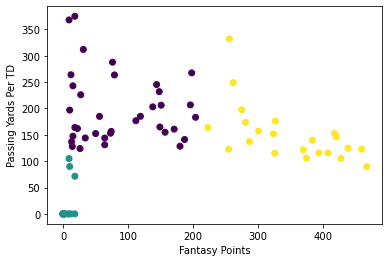

In [37]:
#plt.scatter(x=QBMD19["Fantasy Points"], y=QBMD19['Passing Yards Per TD'], c=QBMD19['class'])
#plt.xlabel('Fantasy Points')
#plt.ylabel('Passing Yards Per TD')
#plt.show


In [38]:
#inertia = []
#k = list(range(1, 11))


#for i in k:
#    km = KMeans(n_clusters=i, random_state=0)
#    km.fit(QBMD19)
#    inertia.append(km.inertia_)

In [39]:
#elbow_data = {"k": k, "inertia": inertia}
#df_elbow = pd.DataFrame(elbow_data)
#df_elbow.head(10)

,k,inertia
0,1,2.500205e+06
1,2,1.062369e+06
2,3,5.081599e+05
3,4,3.209720e+05
4,5,2.115548e+05
5,6,1.494984e+05
6,7,1.122069e+05
7,8,9.441906e+04
8,9,7.958678e+04
9,10,6.764392e+04


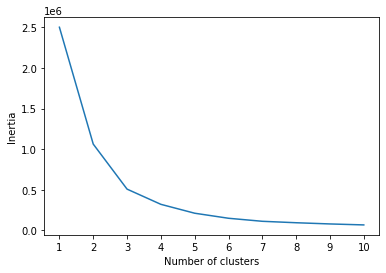

In [40]:
#plt.plot(df_elbow['k'], df_elbow['inertia'])
#plt.xticks(range(1,11))
#plt.xlabel('Number of clusters')
#plt.ylabel('Inertia')
#plt.show()

In [ ]:
#Clusters

In [41]:
#def get_clusters(k, data):
    # Initialize the K-Means model
#    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
#    model.fit(data)

    # Predict clusters
#    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
 #   data["class"] = model.labels_

#    return data

In [42]:
#clusters19 = get_clusters(4, QBMD19)
#clusters20 = get_clusters(4, QBMD20)

In [43]:
#clusters19.head(5)

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,class
Player Name,,,,,,
Aaron Rodgers,468,5,89.562500,2,0.707224,0
Josh Allen,460,10,122.810811,6,0.692308,0
Patrick Mahomes,439,6,124.736842,2,0.663265,0
Russell Wilson,428,13,105.300000,4,0.688172,0
Deshaun Watson,421,7,146.151515,3,0.702206,0


In [44]:
#clusters20.head(5)

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,class
Player Name,,,,,,
Josh Allen,433,15,122.588235,3,0.640599,1
Tom Brady,423,12,124.750000,3,0.668622,1
Justin Herbert,409,14,132.314286,1,0.672697,1
Patrick Mahomes,399,13,130.542857,4,0.666124,1
Matthew Stafford,382,15,122.315789,2,0.673111,1


In [45]:
#def show_clusters19(df):
    plt.scatter(x=QBMD19["Fantasy Points"], y=QBMD19['Passing Yards Per TD'],c=QBMD19['class'])
    plt.xlabel('Fantasy Points')
    plt.ylabel('Passing Yards Per TD')
    plt.show()

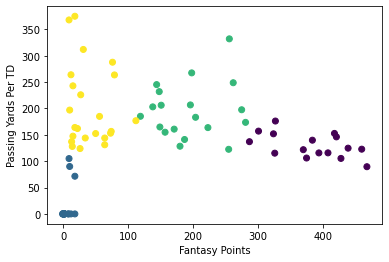

In [46]:
#show_clusters19(clusters19)

In [47]:
#def show_clusters20(df):
 #   plt.scatter(x=QBMD20["Fantasy Points"], y=QBMD20['Passing Yards Per TD'],c=QBMD20['class'])
 #   plt.xlabel('Fantasy Points')
 #   plt.ylabel('Passing Yards Per TD')
 #   plt.show()

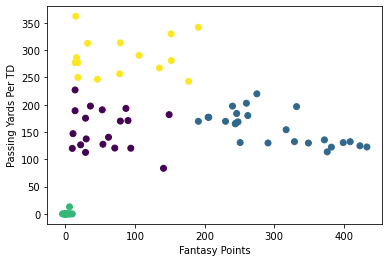

In [48]:
#show_clusters20(clusters20)

In [ ]:
#Hierarchical Clustering

In [ ]:
#normalized = normalize(QBMD19)

In [ ]:
#mergings = linkage(normalized, method='ward')

In [ ]:
#plt.figure(figsize=(20,8))

#dendrogram(mergings,
#          leaf_rotation=90,
#          leaf_font_size=5)

#plt.show()

In [ ]:
#merge_dfHC = pd.DataFrame(normalized)
#merge_dfHC.columns = merge_df.columns

In [ ]:
#cluster = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='ward')
#labels = cluster.fit_predict(merge_dfHC)

In [ ]:
#ActualModel

In [ ]:
#merge_df